## UNSUPERVISED LEARNING MINI PROJECT

### CONTEXT

> E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### CONTENT
> This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

> The data set contains 500K rows and 8 columns. The following is the description of each column.

> - **TransactionNo (categorical)**: a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
> - **Date (numeric)**: the date when each transaction was generated.
> - **ProductNo (categorical)**: a five or six-digit unique character used to identify a specific product.
> - **Product (categorical)**: product/item name.
> - **Price (numeric)**: the price of each product per unit in pound sterling (£).
> - **Quantity (numeric)**: the quantity of each product per transaction. Negative values related to cancelled transactions.
> - **CustomerNo (categorical)**: a five-digit unique number that defines each customer.
> - **Country (categorical)**: name of the country where the customer resides.

### GOAL

> Gather useful intrinsic information by combining RFM model and some unsupervised learning model. 

> For each segments, analyze the data, and try to answer the following questions:

> - How was the sales trend over the months?
> - What are the most frequent purchased products?
> - How many products does the customer purchase in each transaction?
> - How does each cluster/group contribute to the company's revenue?
> - What are the interval date between transactions?
> - Based on your findings, what strategy could you recommend to the business to gain more profit?
> - ***add more if necessary***

> Also, there is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once. 

> Therefore, try to build a supervised learning model to solve this problem.

> Source from UCI Machine Learning Repository: [link to dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

## OVERVIEW

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

> Here we will inspect the data for quality checking.

In [2]:
# load data
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [3]:
# check head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> We can see that there are 2 features with missing values (null).

In [5]:
# check null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## PREPROCESSING

> Since many of the missing values is on the important features (CustomerID), and it's considered as an identifier that will plays an important role to the RFM models, therefore we cannot do anything to this other than dropping the values on this features.

In [6]:
# dropna
df = df.dropna()

In [7]:
# check info after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


> Since the missing values has been handled, next we will try to create a new features (TotalCost) that will play an important role on RFM for monetary value later.

> *TotalCost = Quantity x UnitPrice*.

In [8]:
# create TotalCost
df["TotalCost"] = df["Quantity"]*df["UnitPrice"]

In [9]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


> Then we will adjust the InvoiceDate format. We will create a new feature for it, so that it will fit the RFM model.

In [10]:
# create new feature and change its type
df["TransactionDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [11]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


> We will also prepare the 'target' feature for supervised prediction later.

In [12]:
# prepare target feature, 1 : cancelled order, 0 : completed order
cancel = []
for i in df["InvoiceNo"]:
    if str(i).startswith("C"):
        cancel.append(1)
    else:
        cancel.append(0)

In [13]:
# apply target
df["cancelled"] = cancel

In [14]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 37.2+ MB


> Now that we've finished the preprocess, we will copy the data and then start to build the rfm model.

In [15]:
# create copy for rfm modeling
df1 = df.copy()

## RFM MODEL BUILDING

> `explanation here`

In [16]:
# last transaction date on invoice
now = pd.to_datetime(df['TransactionDate'].max())

In [17]:
# get customer last transaction date
recency = df.groupby(by='CustomerID', as_index = False)['TransactionDate'].max()
recency.columns = ['CustomerID', 'last_trans_date']

#calculate recency
recency['last_trans_date'] = pd.to_datetime(recency['last_trans_date'])
recency['recency'] = recency['last_trans_date'].apply(lambda x: (now - x).days)

In [18]:
# recency table
recency.head()

,CustomerID,last_trans_date,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [19]:
# calculate frequency
frequency = pd.DataFrame()
frequency["CustomerID"] = [i for i in df["CustomerID"].unique()]
frequency["frequency"] = df.groupby('CustomerID')['CustomerID'].transform('count')

In [20]:
# frequency table
frequency.head()

,CustomerID,frequency
0,17850.0,312.0
1,13047.0,312.0
2,12583.0,312.0
3,13748.0,312.0
4,15100.0,312.0


In [21]:
# calculate monetary
monetary = df.groupby(by = 'CustomerID', as_index = False).agg({'TotalCost': 'sum'})
monetary.columns = ['CustomerID', 'monetary']

In [22]:
monetary.head()

,CustomerID,monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [23]:
# create rfm table
rf = pd.merge(recency, frequency, on = "CustomerID")
rfm = pd.merge(rf, monetary, on = "CustomerID")

In [24]:
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary
0,12346.0,2011-01-18,325,180.0,0.00
1,12347.0,2011-12-07,2,180.0,4310.00
2,12348.0,2011-09-25,75,123.0,1797.24
3,12349.0,2011-11-21,18,258.0,1757.55
4,12350.0,2011-02-02,310,5903.0,334.40


In [25]:
# split rfm quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,recency,frequency,monetary
0.25,13812.75,16.0,67.0,293.3625
0.50,15300.50,50.0,143.0,648.0750
0.75,16778.25,143.0,312.0,1611.7250


In [26]:
# function to get quantiles score
# arguments : (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [27]:
# rfm segmentation score
rfm['R_Quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles))
rfm['F_Quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm['M_Quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles))

In [28]:
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,2011-01-18,325,180.0,0.00,4,2,4
1,12347.0,2011-12-07,2,180.0,4310.00,1,2,1
2,12348.0,2011-09-25,75,123.0,1797.24,3,3,1
3,12349.0,2011-11-21,18,258.0,1757.55,2,2,1
4,12350.0,2011-02-02,310,5903.0,334.40,4,1,3


In [29]:
# calculate rfm score
rfm['RFMScore'] =  rfm["R_Quartile"].map(str) + rfm["F_Quartile"].map(str) + rfm["M_Quartile"].map(str)

In [30]:
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,2011-01-18,325,180.0,0.00,4,2,4,424
1,12347.0,2011-12-07,2,180.0,4310.00,1,2,1,121
2,12348.0,2011-09-25,75,123.0,1797.24,3,3,1,331
3,12349.0,2011-11-21,18,258.0,1757.55,2,2,1,221
4,12350.0,2011-02-02,310,5903.0,334.40,4,1,3,413


In [31]:
# set segment name, urutannya dari atas
segname=[]
for i,j,k in zip(rfm["RFMScore"], rfm["F_Quartile"], rfm["M_Quartile"]):
    if i == "111":
        segname.append("Best Customers")
    elif i == "311":
        segname.append("Almost Lost")
    elif i == "411":
        segname.append("Lost Customers")
    elif i == "444":
        segname.append("Lost Cheap Customers")
    elif j == 1:
        segname.append("Loyal Customers")
    elif k == 1:
        segname.append("Big Spenders")
    else:
        segname.append("Other")

In [32]:
# get segment name
rfm["segment"] = segname

In [33]:
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment
0,12346.0,2011-01-18,325,180.0,0.00,4,2,4,424,Other
1,12347.0,2011-12-07,2,180.0,4310.00,1,2,1,121,Big Spenders
2,12348.0,2011-09-25,75,123.0,1797.24,3,3,1,331,Big Spenders
3,12349.0,2011-11-21,18,258.0,1757.55,2,2,1,221,Big Spenders
4,12350.0,2011-02-02,310,5903.0,334.40,4,1,3,413,Loyal Customers


In [34]:
# jumlah masing2 segment
cnt_seg = rfm.groupby("segment", as_index=False)["CustomerID"].nunique().sort_values(by = "CustomerID", ascending=False).reset_index()
# tambahkan kolom percentage
cnt_seg["pct"] = round(cnt_seg["CustomerID"]/sum(cnt_seg["CustomerID"]) *100, 1)

In [35]:
cnt_seg

,index,segment,CustomerID,pct
0,6,Other,1757,40.2
1,5,Loyal Customers,1554,35.5
2,2,Big Spenders,654,15.0
3,1,Best Customers,216,4.9
4,3,Lost Cheap Customers,89,2.0
5,0,Almost Lost,81,1.9
6,4,Lost Customers,21,0.5


> Dari data diatas didapatkan bahwa :
> - Segment Other memiliki porsi yg paling besar dengan 40.2%, diikuti oleh Loyal Customers sebesar 35.5%
> - Total Lost Cheap Customers dan Lost Customers = 2.5%

## CLUSTERING

> `explanation here`

> `choose the algorithms and metrics`

> `try recency vs monetary, recency vs frequency, frequency vs monetary` then `pick the proper feature`.

In [36]:
# clustering
from sklearn.cluster import KMeans

# evaluation
from sklearn.metrics import davies_bouldin_score

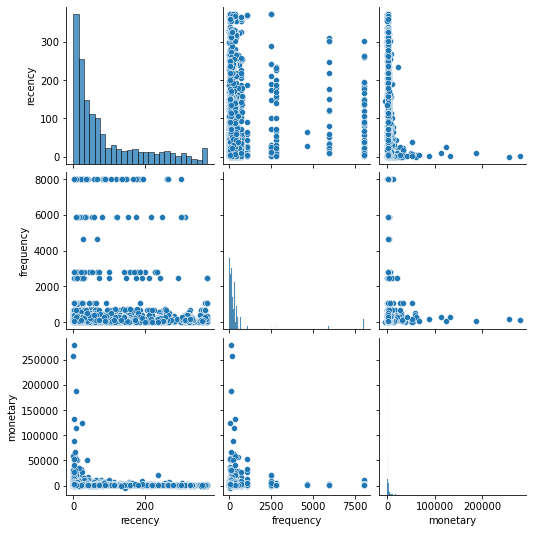

In [37]:
# plot relationship
sns.pairplot(rfm[['recency', 'frequency', 'monetary']])
plt.show()

In [38]:
rfm.isna().sum()

CustomerID            0
last_trans_date       0
recency               0
frequency          1187
monetary              0
R_Quartile            0
F_Quartile            0
M_Quartile            0
RFMScore              0
segment               0
dtype: int64

In [39]:
# fillna dengan median
rfm['frequency'] = rfm['frequency'].fillna(rfm['frequency'].median())

In [40]:
# tentukan nilai X
X = rfm[["frequency", "monetary"]]

In [41]:
# range k dari Kmeans
k = range(1, 10)
inertia = [] 
for i in k:
    model = KMeans(n_clusters = i, max_iter = 1000, random_state=0) # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(X)
    inertia.append(model.inertia_)

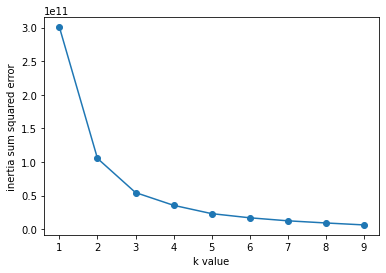

In [42]:
# plot elbow curve
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

In [43]:
# fit model Kmeans
model_km = KMeans(n_clusters = 4, max_iter = 1000, random_state = 0)
model_km.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [44]:
# predict cluster
rfm["cluster_km"] = model_km.predict(X)

In [45]:
# cek hasil
rfm.head()

,CustomerID,last_trans_date,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment,cluster_km
0,12346.0,2011-01-18,325,180.0,0.00,4,2,4,424,Other,0
1,12347.0,2011-12-07,2,180.0,4310.00,1,2,1,121,Big Spenders,0
2,12348.0,2011-09-25,75,123.0,1797.24,3,3,1,331,Big Spenders,0
3,12349.0,2011-11-21,18,258.0,1757.55,2,2,1,221,Big Spenders,0
4,12350.0,2011-02-02,310,5903.0,334.40,4,1,3,413,Loyal Customers,0


In [46]:
# count tiap clusters
rfm["cluster_km"].value_counts()

0    4252
3     102
2      15
1       3
Name: cluster_km, dtype: int64

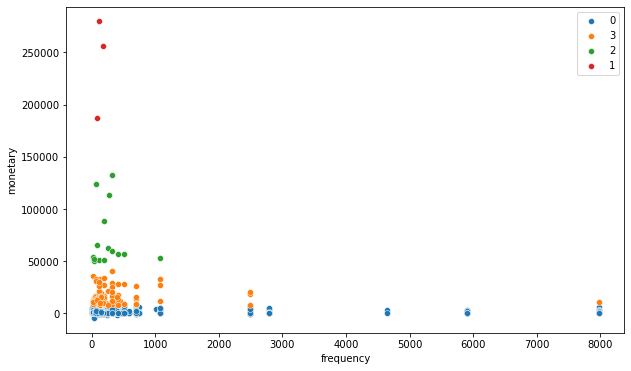

In [47]:
# plot hasil kmeans
plt.figure(figsize = (10,6))
for i in rfm['cluster_km'].unique():
    sns.scatterplot(rfm['frequency'][rfm['cluster_km'] == i], rfm['monetary'][rfm['cluster_km'] == i], label = i)
    
plt.legend()
plt.show()

In [48]:
# evaluasi model dengan davies bouldin score
km_labels = davies_bouldin_score(X, model_km.labels_)

print(f'DB Score Kmeans: {km_labels}')

DB Score Kmeans: 0.46882569598365625


> `general summary`
> - berdasarkan data diatas, customer cluster 0 ialah customer dengan monetary terendah, dan frequencynya beragam, mulai dari 0 sampai dengan 8000.
> - customer cluster 3 ialah customer dengan monetary > 0 dan monetary < 5000, dengan frequency yang beragam.
> - customer cluster 2 ialah customer dengan monetary >= 50000 dan monetary < 150000, dengan frequency < 2000
> - customer cluster 1 ialah customer dengan monetary tertinggi yaitu > 150000, dan dengan frequency < 1000

## EXPLORATORY DATA ANALYSIS

> `explanation here`

> `try to answer the GOAL section`

In [49]:
# gabung ke dataframe
res = pd.merge(df1, rfm, on = "CustomerID")

In [50]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 406828
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
 11  last_trans_date  406829 non-null  datetime64[ns]
 12  recency          406829 non-null  int64         
 13  frequency        406829 non-null  float64       
 14  monetary         406

- #### What is the percentage of cancellations?

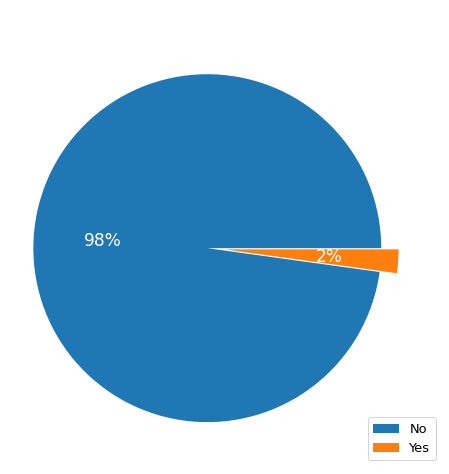

In [51]:
plt.figure(figsize = (12, 8))

plt.title('Cancelled Yes or No?', size = 25, fontweight = 'bold', color = 'white')

labels = 'No', 'Yes'

plt.pie(res['cancelled'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [52]:
res["cancelled"].value_counts()

0    397924
1      8905
Name: cancelled, dtype: int64

> Based on the pie chart :
> - 2% cancelled (8905)
> - 98% not cancelled (397924)

- #### How was the sales trend over the months?

In [53]:
c0 = res[(res['cluster_km'] == 0)]
c1 = res[(res['cluster_km'] == 1)]
c2 = res[(res['cluster_km'] == 2)]
c3 = res[(res['cluster_km'] == 3)]

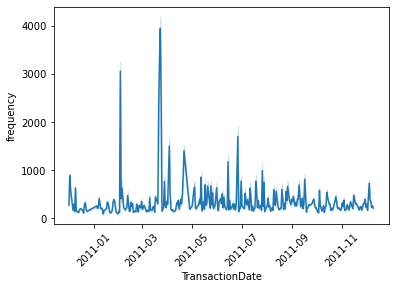

In [54]:
# plot cluster 0
sns.lineplot(data = c0, x = "TransactionDate", y = "frequency")
plt.xticks(rotation=45)
plt.show()

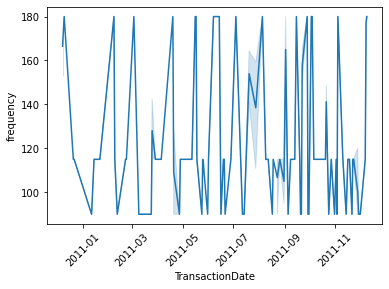

In [55]:
# plot cluster 1
sns.lineplot(data = c1, x = "TransactionDate", y = "frequency")
plt.xticks(rotation=45)
plt.show()

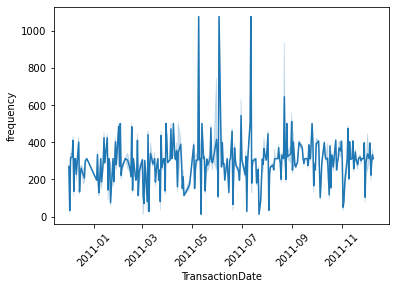

In [56]:
# plot cluster 2
sns.lineplot(data = c2, x = "TransactionDate", y = "frequency")
plt.xticks(rotation=45)
plt.show()

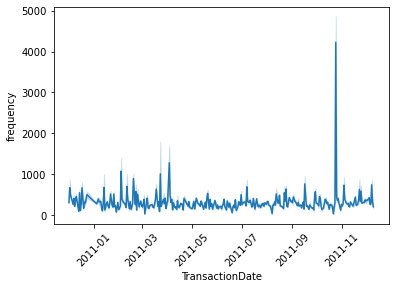

In [57]:
# plot cluster 3
sns.lineplot(data = c3, x = "TransactionDate", y = "frequency")
plt.xticks(rotation=45)
plt.show()

- #### What are the most frequent purchased products?

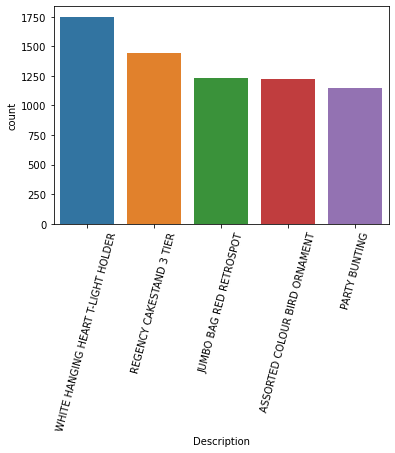

In [58]:
# plot cluster 0
sns.countplot(data = c0, x = 'Description', order=c0.value_counts(c0["Description"]).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [59]:
# cluster 0
c0.value_counts(c0["Description"]).head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    1750
REGENCY CAKESTAND 3 TIER              1444
JUMBO BAG RED RETROSPOT               1234
ASSORTED COLOUR BIRD ORNAMENT         1223
PARTY BUNTING                         1145
dtype: int64

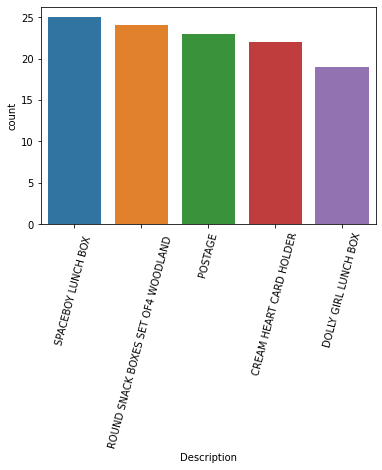

In [60]:
# plot cluster 1
sns.countplot(data = c1, x = 'Description', order=c1.value_counts(c1["Description"]).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [61]:
# cluster 1
c1.value_counts(c1["Description"]).head()

Description
SPACEBOY LUNCH BOX                     25
ROUND SNACK BOXES SET OF4 WOODLAND     24
POSTAGE                                23
CREAM HEART CARD HOLDER                22
DOLLY GIRL LUNCH BOX                   19
dtype: int64

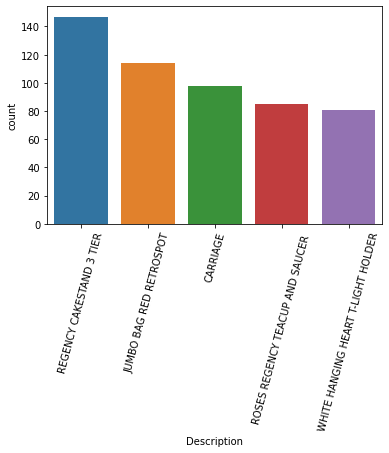

In [62]:
# plot cluster 2
sns.countplot(data = c2, x = 'Description', order=c2.value_counts(c2["Description"]).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [63]:
# cluster 2
c2.value_counts(c2["Description"]).head()

Description
REGENCY CAKESTAND 3 TIER              147
JUMBO BAG RED RETROSPOT               114
CARRIAGE                               98
ROSES REGENCY TEACUP AND SAUCER        85
WHITE HANGING HEART T-LIGHT HOLDER     81
dtype: int64

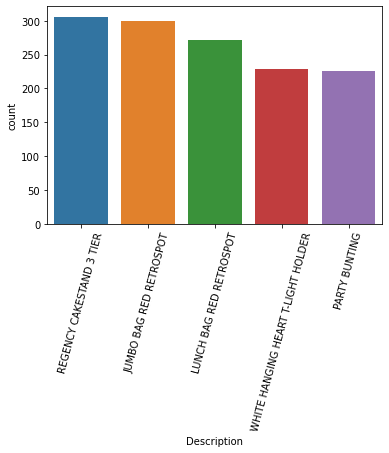

In [64]:
# plot cluster 3
sns.countplot(data = c3, x = 'Description', order=c3.value_counts(c3["Description"]).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [65]:
# cluster 3
c3.value_counts(c3["Description"]).head()

Description
REGENCY CAKESTAND 3 TIER              306
JUMBO BAG RED RETROSPOT               299
LUNCH BAG RED RETROSPOT               271
WHITE HANGING HEART T-LIGHT HOLDER    228
PARTY BUNTING                         226
dtype: int64

- #### How many products does the customer purchase in each transaction?

In [66]:
# cluster 0
c0["InvoiceNo"].value_counts().head()

562031    277
543040    259
570672    259
569897    239
572103    223
Name: InvoiceNo, dtype: int64

In [67]:
# cluster 1
c1['InvoiceNo'].value_counts().head()

572035    125
563076    119
541711    106
562789     96
552883     92
Name: InvoiceNo, dtype: int64

In [68]:
# cluster 2
c2["InvoiceNo"].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

In [69]:
# cluster 3
c3["InvoiceNo"].value_counts().head()

567183    399
547063    294
554098    264
574328    208
580956    184
Name: InvoiceNo, dtype: int64

- #### How does each cluster/group contribute to the company's revenue?

In [70]:
# in pound sterling (£)
# cluster 0
print("Cluster 0 Total Cost = £",c0["TotalCost"].sum())
# cluster 1
print("Cluster 1 Total Cost = £",c1["TotalCost"].sum())
# cluster 2
print("Cluster 2 Total Cost = £",c2["TotalCost"].sum())
# cluster 3
print("Cluster 3 Total Cost = £",c3["TotalCost"].sum())

Cluster 0 Total Cost = £ 4935493.203999999
Cluster 1 Total Cost = £ 723409.68
Cluster 2 Total Cost = £ 1071352.74
Cluster 3 Total Cost = £ 1569810.1900000002


- #### What are the interval date between transactions?

In [71]:
# interval masing masing cluster
print("interval cluster 0 (min = ",c0["recency"].min(),", max = ",c0["recency"].max(),')')
print("interval cluster 1 (min = ",c1["recency"].min(),", max = ",c1["recency"].max(),')')
print("interval cluster 2 (min = ",c2["recency"].min(),", max = ",c2["recency"].max(),')')
print("interval cluster 3 (min = ",c3["recency"].min(),", max = ",c3["recency"].max(),')')

interval cluster 0 (min =  0 , max =  373 )
interval cluster 1 (min =  0 , max =  8 )
interval cluster 2 (min =  0 , max =  38 )
interval cluster 3 (min =  0 , max =  235 )


### SUMMARY

> Through the data exploration that we have done, we can draw the conclusion that :<br>
> 1.) There is 2% (8905) customer cancelled the order and 98% (397924) are not
>
> 2.) The sales trends over the month is varied for each cluster
>
> 3.) The most frequent products purchased in each transaction is :
> - cluster 0 : WHITE HANGING HEART T-LIGHT HOLDER (1750)<br>
> - cluster 1 : SPACEBOY LUNCH BOX                 (25)<br>
> - cluster 2 : REGENCY CAKESTAND 3 TIER           (147)<br>
> - cluster 3 : REGENCY CAKESTAND 3 TIER           (306)
>
> 4.) The number of products purchased by customers for each transaction varies, but the highest is in cluster 2 with Invoice No. 576339 with a total of 542 types of products purchased
>
> 5.) The contribution of each cluster/group to the company's revenue is:
> - Cluster 0 Total Cost = £ 4935493.203999999<br>
> - Cluster 1 Total Cost = £ 723409.68<br>
> - Cluster 2 Total Cost = £ 1071352.74<br>
> - Cluster 3 Total Cost = £ 1569810.1900000002<br>
> with cluster 0 having the highest revenue
>
> 6.) The interval date between the transaction is: <br>
> - cluster 0 (min =  0 , max =  373 )<br>
> - cluster 1 (min =  0 , max =  8 )<br>
> - cluster 2 (min =  0 , max =  38 )<br>
> - cluster 3 (min =  0 , max =  235 )
>
> 7.) The strategies that I recommend to businesses to gain more profit are:<br>
> - Increasing the stock of product, because there is 2% customer cancelled the order due to out-of-stock conditions on some products.
> - Maybe we can create a discount voucher for each cluster to increase sales and also keeping the customers on making transactions.
> - Even though cluster 1 has a low shopping frequency, they are the cluster that has the highest monetary, so maybe we can create a loyalty program to increase their shopping frequency so we dont lose them.

## PREDICTIVE MODEL BUILDING

> `explanation`

> `do the usual steps, start from feature engineering to model evaluation, use resample if necessary`

In [72]:
# buat table prediction
df_new = res[["Quantity", "TotalCost", "recency", "frequency", "monetary", "cluster_km", "cancelled"]]

In [73]:
df_new.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km,cancelled
0,6,15.30,302,312.0,5288.63,0,0
1,6,20.34,302,312.0,5288.63,0,0
2,8,22.00,302,312.0,5288.63,0,0
3,6,20.34,302,312.0,5288.63,0,0
4,6,20.34,302,312.0,5288.63,0,0


In [74]:
# cek target
df_new["cancelled"].value_counts()

0    397924
1      8905
Name: cancelled, dtype: int64

## FEATURE ENGINEERING

### FEATURE SCALING

In [75]:
# import library untuk scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [76]:
# min max scaler
scaler = RobustScaler()

In [77]:
column_name = ["Quantity", "TotalCost", "recency", "frequency", "monetary"]

In [78]:
for i in column_name:
    df_new[i] = scaler.fit_transform(df_new[[i]])

In [79]:
df_new.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km,cancelled
0,0.1,0.274510,7.972222,0.808612,0.52774,0,0
1,0.1,0.603922,7.972222,0.808612,0.52774,0,0
2,0.3,0.712418,7.972222,0.808612,0.52774,0,0
3,0.1,0.603922,7.972222,0.808612,0.52774,0,0
4,0.1,0.603922,7.972222,0.808612,0.52774,0,0


## MODELING

In [80]:
#import library untuk modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

### LOGISTIC REGRESSION

In [81]:
# split target variable
X = df_new.drop(columns = 'cancelled')
y = df_new['cancelled']

In [82]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [83]:
# model train dan fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
# buat ypredict
y_pred = model.predict(X_test)

In [85]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [86]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [87]:
#cek hasil
result.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km,y_act,y_pred
149468,3.5,3.954248,0.222222,-0.143541,0.697333,0,0,0
288958,0.7,0.443137,2.305556,0.000000,-0.362771,0,0,0
129114,-0.3,1.490196,-0.166667,-0.095694,0.554305,0,0,0
63987,0.5,0.633987,-0.361111,1.712919,10.816136,2,0,0
191581,0.7,-0.396078,-0.138889,-0.071770,-0.214383,0,0,0


#### CONFUSION MATRIX

In [88]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[79543     0]
 [    0  1823]]


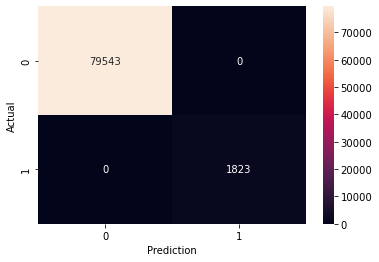

In [89]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [90]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



In [91]:
# fungsi untuk melakukan plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label = labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score: 1.0



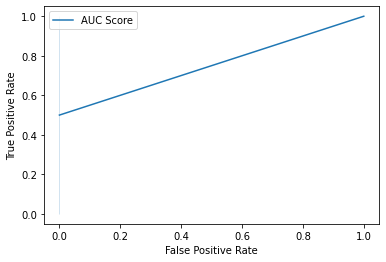

In [92]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

#### CV SCORE

In [93]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [94]:
print("CV F1:", cv_score(model, X_train, y_train, "f1",5))
print("CV Accuracy:", cv_score(model, X_train, y_train, "accuracy",5))
print("CV Precision :", cv_score(model, X_train, y_train, "precision",5))
print("CV Recall :", cv_score(model, X_train, y_train, "recall",5))

CV F1: (1.0, 1.0)
CV Accuracy: (1.0, 1.0)
CV Precision : (1.0, 1.0)
CV Recall : (1.0, 1.0)


### DECISION TREE

In [96]:
df_new2 = res[["Quantity", "TotalCost", "recency", "frequency", "monetary", "cluster_km", "cancelled"]]

In [97]:
df_new2.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km,cancelled
0,6,15.30,302,312.0,5288.63,0,0
1,6,20.34,302,312.0,5288.63,0,0
2,8,22.00,302,312.0,5288.63,0,0
3,6,20.34,302,312.0,5288.63,0,0
4,6,20.34,302,312.0,5288.63,0,0


In [98]:
# split target variable
X = df_new2.drop(columns = 'cancelled')
y = df_new2['cancelled']

In [99]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [100]:
# model train dan fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
# buat ypredict
y_pred = model.predict(X_test)

In [102]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [103]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [104]:
#cek hasil
result.head()

,Quantity,TotalCost,recency,frequency,monetary,cluster_km,y_act,y_pred
149468,40,71.60,23,113.0,6147.40,0,0,0
288958,12,17.88,98,143.0,779.36,0,0,0
129114,2,33.90,9,123.0,5423.15,0,0,0
63987,10,20.80,2,501.0,57385.88,2,0,0
191581,12,5.04,10,128.0,1530.75,0,0,0


#### CONFUSION MATRIX

In [105]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[79543     0]
 [    0  1823]]


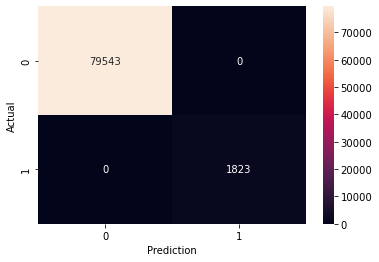

In [106]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [107]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



In [108]:
# fungsi untuk melakukan plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label = labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score: 1.0



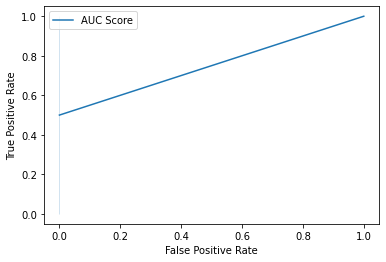

In [109]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

#### CV SCORE

In [110]:
print("CV F1:", cv_score(model, X_train, y_train, "f1",5))
print("CV Accuracy:", cv_score(model, X_train, y_train, "accuracy",5))
print("CV Precision :", cv_score(model, X_train, y_train, "precision",5))
print("CV Recall :", cv_score(model, X_train, y_train, "recall",5))

CV F1: (1.0, 1.0)
CV Accuracy: (1.0, 1.0)
CV Precision : (1.0, 1.0)
CV Recall : (1.0, 1.0)


> `best model conclusion`

> Note:<br>
Precision is equal to 1 if FP = 0.<br>
So high precision relates to the low false positive rate or a small amount of I type errors.<br>
Recall is equal to 1 if FN = 0.<br>
So high recall relates to the low false negative rate or a small amount of II type errors.<br>
>
> source : https://towardsdatascience.com/finally-remember-what-precision-and-recall-is-and-stop-being-afraid-of-these-questions-in-f61981930c67

In [111]:
res.to_csv("data_rfm.csv", index = 0)

In [112]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 406828
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
 11  last_trans_date  406829 non-null  datetime64[ns]
 12  recency          406829 non-null  int64         
 13  frequency        406829 non-null  float64       
 14  monetary         406